---
# <h1><center><u>G-Research Crypto Forecasting</u></center></h1>
<h5><center><u>Use your ML expertise to predict real crypto market data</u></center></h5>

---


### **Objective**

In the [G-Research Crypto Forecasting](https://www.kaggle.com/c/g-research-crypto-forecasting) on Kaggle, participants have the challenge to predict price returns across a bundle of major cryptocurrencies. 

Use your machine learning expertise to forecast short term returns in 14 popular cryptocurrencies. We have amassed a dataset of millions of rows of high-frequency market data dating back to 2018 which you can use to build your model. Once the submission deadline has passed, your final score will be calculated over the following 3 months using live crypto data as it is collected.

The notebook presents an introduction to crypto forecasting, describing the structure and elements of the dataset, some relevant statistical properties, as well as building a couple of LSTM Prediction and Price prediction for all assets. Finally providing an example code submission.

 <img alt="Crypto" src="https://images.unsplash.com/photo-1634704784915-aacf363b021f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1770&q=80" width="550px"/>

### **Data**
We can see the different features included in the dataset [Dataset](https://www.kaggle.com/competitions/g-research-crypto-forecasting/data). Specifically, the features included per asset are the following:
*   **timestamp**: All timestamps are returned as second Unix timestamps (the number of seconds elapsed since 1970-01-01 00:00:00.000 UTC). Timestamps in this dataset are multiple of 60, indicating minute-by-minute data.
*   **Asset_ID**: The asset ID corresponding to one of the crytocurrencies (e.g. `Asset_ID = 1` for Bitcoin). The mapping from `Asset_ID` to crypto asset is contained in `asset_details.csv`.
*   **Count**: Total number of trades in the time interval (last minute).
*   **Open**:	Opening price of the time interval (in USD).
*   **High**:	Highest price reached during time interval (in USD).
*   **Low**: Lowest price reached during time interval (in USD).
*   **Close**:	Closing price of the time interval (in USD).
*   **Volume**:	Quantity of asset bought or sold, displayed in base currency USD.
*   **VWAP**: The average price of the asset over the time interval, weighted by volume. VWAP is an aggregated form of trade data.
*   **Target**: Residual log-returns for the asset over a 15 minute horizon. 

The first two columns define the time and asset indexes for this data row. The 6 middle columns are feature columns with the trading data for this asset and minute in time. The last column is the prediction target, which we will get to later in more detail.

We also view the asset information, including the list of all assets, the `Asset_ID` to asset mapping, and the weight of each asset used to weigh their relative importance in the evaluation metric.


<span class="w3-tag w3-large"><b>WARNING</b></span>

*This notebook is written for [G-Research Crypto Forecasting](https://www.kaggle.com/c/g-research-crypto-forecasting) competition at Kaggle and learning purposes only. Do not use it for real trading with real money. The information provided on this notebook does not constitute investment advice, financial advice, trading advice, or any other sort of advice and you should not treat any of the website's content as such. This notebook does not recommend that any cryptocurrency should be bought, sold, or held by you. Do conduct your own due diligence and consult your financial advisor before making any investment decisions.*

### Cryptocurrency

According to Wikipedia, a cryptocurrency, crypto-currency, or crypto is a collection of binary data which is designed to work as a medium of exchange. Individual coin ownership records are stored in a ledger, which is a computerized database using strong cryptography to secure transaction records, to control the creation of additional coins, and to verify the transfer of coin ownership. Cryptocurrencies are generally fiat currencies, as they are not backed by or convertible into a commodity. Some crypto schemes use validators to maintain the cryptocurrency. In a proof-of-stake model, owners put up their tokens as collateral. In return, they get authority over the token in proportion to the amount they stake. 

Generally, these token stakers get additional ownership in the token over time via network fees, newly minted tokens or other such reward mechanisms. Cryptocurrency does not exist in physical form (like paper money) and is typically not issued by a central authority. Cryptocurrencies typically use decentralized control as opposed to a central bank digital currency (CBDC). When a cryptocurrency is minted or created prior to issuance or issued by a single issuer, it is generally considered centralized. When implemented with decentralized control, each cryptocurrency works through distributed ledger technology, typically a blockchain, that serves as a public financial transaction database.

Bitcoin, first released as open-source software in 2009, is the first decentralized cryptocurrency. Since the release of bitcoin, many other cryptocurrencies have been created.

### Technical Indicator

Technical Analysis (TA) is a popular technique to evaluate stocks or coins based on similar data points and elements. This articulation will tell you about TA while also delving into trading indicators before we conclude with the best indicators for you. 

The price charts of any coin/stock are free for diverse interpretations. Hence, during TA, technicals like support levels can go for a toss as every trader with their prejudice intact can draw support lines at different price points. Support and resistance zones are vital and drawing them should never boil down to destiny.

To remove this uncertainty and provide a level-playing field, technical indicators are used. They are mathematical calculations used to plot lines on the price chart to identify trends and key price points of a coin/stock.
Think of trading indicators as a map that guides you through the maze of ambiguity. Using them in coalition with a bit of market psychology and understanding of risk will enable you to make better trading decisions. Given their quantitative nature, you can also automate your trades using these indicators.

---
### Table of Contents

1. Importing the required libraries
       
2. Load data

3. Explonatary Data Analysis

4. Bitcoin Performance

5. Ethereum Performance

6. LSTM Prediction

    - Bitcoin LSTM prediction

    - Ethereum LSTM prediction

7. Price prediction for all assets
---

In [1]:
from IPython.core.display import display, HTML, Javascript
html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
        <link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Kadwa">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open Sans">
        <style>
        .title-section {
            font-family: "Kadwa", Arial, sans-serif;
            color: "#6A8CAF";
            letter-spacing: 2px;
            }
        body {
            font-family: "Open Sans", Arial, sans-serif;
            }
        </style>
    </head>
</html>
"""
HTML(html_contents)

## 1. Importing the required libraries

The specific functions and classes imported from these libraries will likely be used later in the code to perform various data analysis and machine learning tasks, such as preprocessing the data, training a neural network, and creating visualizations.

In [2]:
# Importing essential libraries

import pandas as pd # Pandas is a library for data manipulation and analysis.
import numpy as np  # NumPy is a library for working with arrays and numerical operations.

import matplotlib.pyplot as plt     # Matplotlib is a library for creating visualizations such as plots and charts.
import matplotlib.ticker as ticker  # ticker module provides a set of classes to support various tick locating and formatting strategies in matplotlib plots.
import seaborn as sns               # Seaborn is a library that provides additional visualization capabilities built on top of Matplotlib.

import datetime as dt               # DateTime is a library for working with dates and times.  

from sklearn.preprocessing import MinMaxScaler  # MinMaxScaler is a class from the Scikit-learn library that is used for scaling data.

from keras.models import Sequential             # Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.
from keras.layers import Dense, LSTM
import math

# The plt.style.use('fivethirtyeight') statement sets the style of Matplotlib plots to the "fivethirtyeight" theme, 
# which is a style inspired by the popular data journalism website FiveThirtyEight.
plt.style.use('fivethirtyeight')          

# The warnings.filterwarnings('ignore') statement suppresses any warnings that might be generated by the code.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Install finplot library
# !pip -q install mplfinance
# import mplfinance as mpf
# from matplotlib.finance import candlestick2_ohlc

## 2. Load Dataset

In [4]:
# load dataset
train = pd.read_csv("../input/g-research-crypto-forecasting/train.csv")
asset_details = pd.read_csv("../input/g-research-crypto-forecasting/asset_details.csv")
df_test = pd.read_csv("../input/g-research-crypto-forecasting/example_test.csv")
mapping = dict(asset_details[['Asset_ID', 'Asset_Name']].values)
train["Asset name"] = train["Asset_ID"].map(mapping)

In [5]:
df_train = train
df_asset_details = asset_details

In [6]:
asset_details.sort_values(by=['Weight'], inplace=True, ascending=False)

Bitcoin has highest weight is the top on the list, followed by Ethereum. We will focus on the top two crypto currencies.

In [7]:
# Preprocessing
# Creates a new DataFrame called temp by making a copy of the train DataFrame and resetting the index to start at 0. 
# The drop=True argument tells the function to drop the old index column.
temp = train.reset_index(drop = True) 

# Adds a new column to the temp DataFrame called "TIME" that contains datetime values. 
# The values are derived from the "timestamp" column in the temp DataFrame, which contains Unix timestamps (i.e., the number of seconds since January 1, 1970). 
# The pd.to_datetime() function converts the Unix timestamps to datetime values using the specified unit of "s" (i.e., seconds).
temp['TIME'] = pd.to_datetime(temp['timestamp'], unit='s')

In [8]:
# Adds a new column to the temp DataFrame called "Year", which is populated with the year component of the "TIME" column (assuming "TIME" is a datetime column).
temp['Year'] = temp['TIME'].dt.year

# Renames the columns in temp by replacing any spaces in the column names with underscores.
temp.columns =[column.replace(" ", "_") for column in temp.columns]

# Selects a subset of columns from the temp DataFrame (Open, High, Low, Close, Volume, and VWAP), 
# but only for rows that do not contain any missing values (i.e., have been dropped using dropna()).
temp.dropna()[['Open', 'High', 'Low', 'Close', 'Volume','VWAP']]

# Creates a new DataFrame called volume_yr by grouping the temp DataFrame by "Year" and "Asset_name" and selecting the maximum value of the "Volume" column for each group. 
# The resulting DataFrame has columns "Year", "Asset_name", and "Volume".
volume_yr = temp.groupby(['Year','Asset_name'])['Volume'].max().reset_index()

# Creates a new DataFrame called volume_yr by selecting only the rows from the volume_yr DataFrame where the "Year" column is equal to 2021. 
# This filters the data to only include information about the maximum volume for each asset in 2021.
volume_yr = volume_yr.query("Year == 2021")

## 3. Explonatary Data Analysis

Exploratory data analysis (EDA) is very important for any data science project, including the G-Research Crypto Forecasting project. EDA is the process of analyzing and understanding the data at hand in order to identify patterns, relationships, and anomalies that may be useful for subsequent modeling and analysis.

In the case of the G-Research Crypto Forecasting project, EDA can help to:

- Identify any missing or inconsistent data that may need to be cleaned or imputed.
- Understand the distributions and ranges of the various features in the dataset, which can inform the choice of appropriate preprocessing and modeling techniques.
- Identify any correlations or relationships between the features that may be useful for forecasting cryptocurrency prices.
- Visualize the data in various ways in order to gain insights and communicate results to stakeholders.

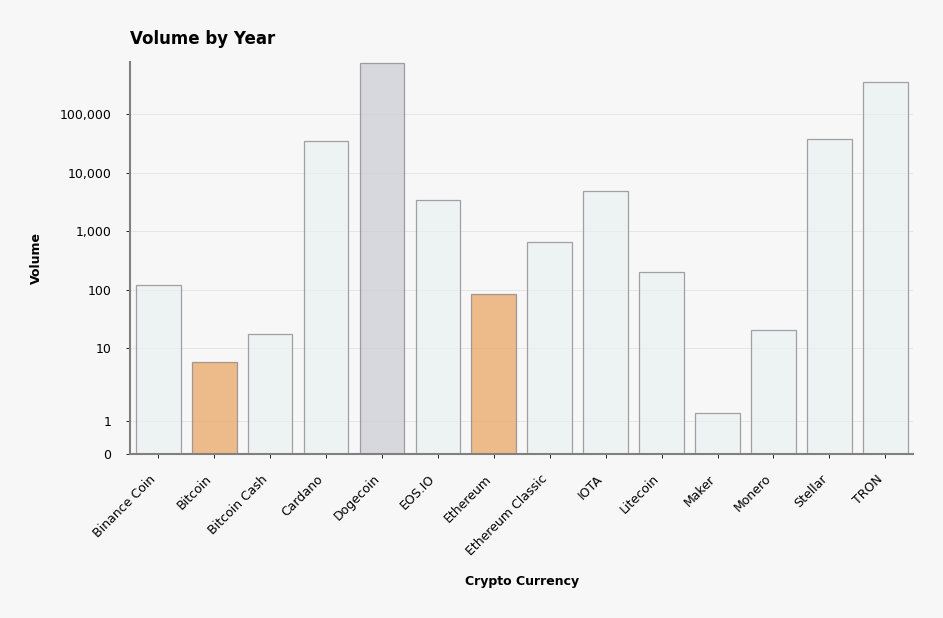

In [9]:
# Creates a bar plot using Seaborn library to display the volume of different cryptocurrencies for the year 2021. 
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(3, 5), facecolor='#F7F7F7')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

# The plot is customized with a color palette, background color, and formatted with axis labels, tick marks, and title. 
background_color = "#F7F7F7"
color_map = ["#E8F0F2" for _ in range(20)]
color_map[4] = "#C9CCD5" #F2A154 79B4B7
color_map[1] = "#F2A154"
color_map[6] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

for s in ['bottom','left']:
  ax0.spines[s].set_linewidth(0.5)
  ax0.spines[s].set_color('grey')
    
#graph
# The y-axis is scaled in a logarithmic fashion using the set_yscale method. The volume_yr DataFrame is used as the data source for the plot. 
ax0 = sns.barplot(ax=ax0, y=volume_yr['Volume']/1000, x=volume_yr['Asset_name'], 
                      zorder=2, linewidth=0.3, edgecolor="#7F7C82", 
                      orient='v', saturation=0.9, alpha=0.7)
ax0.grid(which='major', axis='y', zorder=0, color='#CDD0CB', linewidth=0.2, alpha=0.5)
ax0.set_yscale('symlog')

#format axis
ax0.set_ylabel("Volume",fontsize=3, weight='semibold')
ax0.set_xlabel("Crypto Currency",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.2, length=1)
plt.setp( ax0.xaxis.get_majorticklabels(), rotation=45, ha="right" )

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1+2000000, 'Volume by Year', fontsize=4, ha='left', va='top', weight='semibold')

# Finally, the FuncFormatter method from the ticker module is used to format the y-axis labels to include comma separators.
y_format = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax0.yaxis.set_major_formatter(y_format)

plt.show()

New comer crypto currency Dodgecoin, has highest volume transaction this year, while the two most popular currencies Bitcoin and Etherium are a lot less volumes.

## 4. Bitcoin Performance
Now let us see how is the performance of Bitcoin from the data. The given data is from 2018 until end of 2020 last year, lowest timeframe is in seconds. For our analysis let's assume we will trade on daily time frame or longer. We use simple technical indicators that commonly use for technical analysis: Simple Moving Average (SMA) and Relative Strength Index (RSI).

### **Difference between Bitcoin and Ethereum:**
Bitcoin and Ethereum are both cryptocurrencies, but they have some fundamental differences in terms of their design, purpose, and features.

First, Bitcoin is primarily a digital currency designed as a decentralized alternative to traditional fiat currencies. It was created in 2009 as the first cryptocurrency and is based on a blockchain technology that records and verifies transactions on a decentralized, distributed ledger. Bitcoin's main purpose is to facilitate peer-to-peer transactions and serve as a store of value.

On the other hand, Ethereum is a decentralized computing platform that enables developers to build and deploy decentralized applications (DApps) on its blockchain. Ethereum was created in 2015 and introduced the concept of smart contracts, which are self-executing contracts with the terms of the agreement directly written into code. Ethereum's main purpose is to provide a platform for building decentralized applications and creating new tokens.

Another major difference between Bitcoin and Ethereum is their consensus mechanisms. Bitcoin uses a proof-of-work (PoW) consensus algorithm, which requires miners to solve complex mathematical puzzles to validate transactions and create new blocks. Ethereum, on the other hand, is in the process of transitioning to a proof-of-stake (PoS) consensus algorithm, which will rely on validators staking their own cryptocurrency to secure the network.

In summary, while both Bitcoin and Ethereum are cryptocurrencies, Bitcoin is primarily designed as a digital currency and store of value, while Ethereum is designed as a platform for building decentralized applications and creating new tokens. They also differ in their consensus mechanisms, with Bitcoin using PoW and Ethereum transitioning to PoS.

## `Moving Average`
Moving averages simplify and smoothen price fluctuations, reducing the noise and giving you a better idea of which direction the market is going, and where it might potentially go. Reducing noise from a chart will give you a much clearer picture of what is happening.

MA’s are calculated by summing up the previous data points, or candles, which are then divided by the number of points. What does this mean?

A 20 MA is derived from summing up the previous 20 periods, divided by 20.
A 100 MA is derived from summing up the previous 100 periods, divided by 100.

## `Simple Moving Average (SMA)`

The Simple Moving Average, or SMA line, is calculated based on the closing price of a period. A ‘period’ means a candle. For example, the closing price of 3 periods or candles is summed up and then divided by 3. Every period in the calculation has the same weight.

             An example: we have 3 periods, $50, $45, and $60.
             The formula is: 50 + 45 + 60 = 155 / 3 (the number of periods) = 51.66 as a 3 SMA.

The Simple Moving Average is very smooth and is at its strongest as a long-term indicator, on any timeframe.

In [10]:
#Extract Bitcoin data


# This code extracts Bitcoin data from the training dataset and resamples it daily. Then, it selects the desired columns and drops rows with null values. 
temp = train.query("Asset_ID == 1").reset_index(drop = True) # bitcoin
temp['TIME'] = pd.to_datetime(temp['timestamp'], unit='s')

all_data = temp.groupby(['Asset_ID', 'Asset name']).resample('D', on='TIME', origin='start').agg(
    {"Open": "first", 
     "Close": "last", 
     "Low": "min", 
     "High": "max",
     "Volume": "last",
     "VWAP": "max"
    }
).dropna()[['Open', 'High', 'Low', 'Close', 'Volume','VWAP']]

# Finally, it resets the index and sets the time column as the index of the resulting data frame.
all_data=all_data.reset_index()
all_data=all_data.set_index('TIME')

In [11]:
# This code sets the start and end dates for the data to be extracted from the all_data DataFrame, 
# and selects only the columns Open, High, Low, Close, VWAP, and Volume for the time period from start to end. 
# The resulting DataFrame is stored in the variable selected_data.

start = dt.datetime.strptime('2018-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2021-09-20', '%Y-%m-%d')
selected_data = all_data.loc[start:end,['Open','High','Low','Close', 'VWAP', 'Volume']]

In [12]:
# mpf.plot(selected_data, # the dataframe containing the OHLC (Open, High, Low and Close) data
#          type='candle', # use candlesticks 
#          volume=True, # also show the volume
#          mav=(5, 15), # use two different moving averages
#          figratio=(3,1), # set the ratio of the figure
#          style='yahoo',  # choose the yahoo style
#          title='Bitcoin Daily'
#          )

We can see that by using simple technical indicators on daily trading, we can get nice profits. In 2020 shows a significant price increases started around May, despite of the pandemic of Covid-19. We see the spike of Covid-19 was during Marc 2020 then back to rise again during pandemic.

## `Relative Strength Index (RSI)`
RSI is one of the most common momentum indicator aimed at quantifies price changes and the speed of such change. The most elementary way of using the index is buying when an asset or cryptocurrency is oversold, and selling when it’s overbought.

Generally, an asset is overbought when the RSI value is 70% or above, and oversold when the value is 30% or below. When an asset is overbought, it’s a clear signal of a looming downtrend. On the flip side, oversold security is a sign of an incoming upward trend. In this case, the weakness of the asset is running out of steam and it’s gathering momentum to climb higher. 

RSI is the source of diverse trend trading strategies. One other common trading strategy is buying or selling when RSI hits the midline or crosses it. This depicts the start of a new trend. 

When the RSI is above 50, a bullish trend is brewing. When it’s below 50, it’s the start of a bearish trend. 

While using the midline cross-trading strategy, traders frequently use the ratios of 70/30, 50/50 or 60/40 as resistance and support in bullish or bearish trends. 

When the resistance suffers a hit, a trend reversal may occur. Hence, traders should spring to action accordingly.

In [13]:
#RSI
# Calculates the Relative Strength Index (RSI) for the data in all_data. The RSI is a technical indicator used in finance to measure the strength of a security's price action. 
# The RSI is calculated based on the average gains and losses over a given period of time, typically 14 days. 

all_data['Diff'] = all_data.groupby('Asset_ID')['Close'].transform(lambda x: x.diff())
all_data['Up'] = all_data['Diff']
all_data.loc[(all_data['Up']<0), 'Up'] = 0

all_data['Down'] = all_data['Diff']
all_data.loc[(all_data['Down']>0), 'Down'] = 0 
all_data['Down'] = abs(all_data['Down'])

# In this code, the RSI is calculated for two different periods, 5 days and 15 days, and the ratio of the two RSI values is calculated and stored in a new column called RSI_ratio.'''
all_data['avg_5up'] = all_data.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=5).mean())
all_data['avg_5down'] = all_data.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=5).mean())

all_data['avg_15up'] = all_data.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=15).mean())
all_data['avg_15down'] = all_data.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=15).mean())

all_data['RS_5'] = all_data['avg_5up'] / all_data['avg_5down']
all_data['RS_15'] = all_data['avg_15up'] / all_data['avg_15down']

all_data['RSI_5'] = 100 - (100/(1+all_data['RS_5']))
all_data['RSI_15'] = 100 - (100/(1+all_data['RS_15']))

all_data['RSI_ratio'] = all_data['RSI_5']/all_data['RSI_15']

In [14]:
start = dt.datetime.strptime('2021-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2021-09-20', '%Y-%m-%d')
selected_data = all_data.loc[start:end,['Open','High','Low','Close','RSI_15', 'VWAP', 'Volume']]

# apd = mpf.make_addplot(selected_data['RSI_15'],panel=2,color='lime',ylim=(10,90),secondary_y=True)
# mpf.plot(selected_data, # the dataframe containing the OHLC (Open, High, Low and Close) data
#          type='candle', # use candlesticks 
#          volume=True, # also show the volume
#          mav=(5,15), # use two different moving averages
#          figratio=(3,1), # set the ratio of the figure
#          addplot=apd, # RSI
#          style='yahoo',  # choose the yahoo style
#          title='Bitcoin Daily (RSI)' # title
#          )

The chart shows the best performance of Bitcoin this year. By combining SMA and RSI together we have a better indicators for trading decision. The technical indicator tells that we only buy when the the blue line (SMA_5) is above red line (SMA_15) and RSI is above 80, and sell when the red line is below the green line and RSI is below 20.

You see the price drop in January this year, then rebound back and continue rise and reach all time high at April. RSI indicator reach its lowest below 20 in end of April. Fast SMA (5) crossing the long SMA (15) happened few times, where you can buy, and sell when SMA (5) crossing down the SMA (15). RSI helps tells the confirmation to buy or sell.

## 5. Ethereum Performance

Now let's do the same for Ethereum and see its performance.

In [15]:
#Extract Ethereum data

# This code extracts Ethereum data from the train DataFrame and resamples it to daily frequency. 
# It then selects only the relevant columns and sets the index to be the TIME column.

temp1 = train.query("Asset_ID == 6").reset_index(drop = True) # Etherium
temp1['TIME'] = pd.to_datetime(temp1['timestamp'], unit='s')

all_data1 = temp1.groupby(['Asset_ID', 'Asset name']).resample('D', on='TIME', origin='start').agg(
    {"Open": "first", 
     "Close": "last", 
     "Low": "min", 
     "High": "max",
     "Volume": "last",
     "VWAP": "max"
    }
).dropna()[['Open', 'High', 'Low', 'Close', 'Volume','VWAP']]

all_data1=all_data1.reset_index()
all_data1=all_data1.set_index('TIME')

In [16]:
#RSI
# This code block calculates the Relative Strength Index (RSI) for Ethereum data. 
# It follows the same steps as the previous RSI calculation for Bitcoin data. 
# The RSI values are calculated based on the difference in closing prices over a specified time period, and are used to evaluate whether a particular asset is oversold or overbought. 

all_data1['Diff'] = all_data1.groupby('Asset_ID')['Close'].transform(lambda x: x.diff())
all_data1['Up'] = all_data1['Diff']
all_data1.loc[(all_data1['Up']<0), 'Up'] = 0

all_data1['Down'] = all_data1['Diff']
all_data1.loc[(all_data1['Down']>0), 'Down'] = 0 
all_data1['Down'] = abs(all_data1['Down'])

all_data1['avg_5up'] = all_data1.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=5).mean())
all_data1['avg_5down'] = all_data1.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=5).mean())

all_data1['avg_15up'] = all_data1.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=15).mean())
all_data1['avg_15down'] = all_data1.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=15).mean())

all_data1['RS_5'] = all_data1['avg_5up'] / all_data1['avg_5down']
all_data1['RS_15'] = all_data1['avg_15up'] / all_data1['avg_15down']

all_data1['RSI_5'] = 100 - (100/(1+all_data1['RS_5']))
all_data1['RSI_15'] = 100 - (100/(1+all_data1['RS_15']))

# The RSI ratio is also calculated as the ratio of the RSI values calculated over two different time periods.
all_data1['RSI_ratio'] = all_data1['RSI_5']/all_data1['RSI_15']

In [17]:
start = dt.datetime.strptime('2021-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2021-09-20', '%Y-%m-%d')
selected_data1 = all_data1.loc[start:end,['Open','High','Low','Close','RSI_15', 'VWAP', 'Volume']]
# apd = mpf.make_addplot(selected_data1['RSI_15'],panel=2,color='lime',ylim=(10,90),secondary_y=True)
# mpf.plot(selected_data1, # the dataframe containing the OHLC (Open, High, Low and Close) data
#          type='candle', # use candlesticks 
#          volume=True, # also show the volume
#          mav=(5,15), # use two different moving averages
#          figratio=(3,1), # set the ratio of the figure
#          addplot=apd, # RSI
#          style='yahoo',  # choose the yahoo style
#          title='Ethereum Daily' # title
#          )

## 6. LSTM Prediction

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video).

LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series.
A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.

LSTMs are very powerful in sequence prediction problems because they’re able to store past information. This is important in our case because the previous price of a stock is crucial in predicting its future price.

## `Bitcoin LSTM prediction`

In [18]:
from sklearn.preprocessing import MinMaxScaler  # import MinMaxScaler from scikit-learn
from keras.models import Sequential  # import Sequential model from Keras
from keras.layers import Dense, LSTM  # import Dense and LSTM layers from Keras
import matplotlib.pyplot as plt  # import pyplot module from Matplotlib
import math  # import math module
plt.style.use('fivethirtyeight')  # set the style of the plots to "fivethirtyeight"

### <span class="title-section w3-large">Split the data.</span>

In [19]:
# selecting the 'Close' column from the 'selected_data' dataframe, converting it to a numpy array, and then calculating the 
# training data length as 80% of the total dataset length rounded up to the nearest integer using the math.ceil function.

data = selected_data.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data itno x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

### <span class="title-section w3-large">Build the LSTM Model.</span>

In [20]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
# Create new array containing scaled values from index 1028 to 1359
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# convert data to numpy array
x_test = np.array(x_test)

# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean square error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )

2022-01-23 16:32:58.058970: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


150/150 [==============================] - 6s 21ms/step - loss: 0.0323


### <span class="title-section w3-large">Plot the data</span>

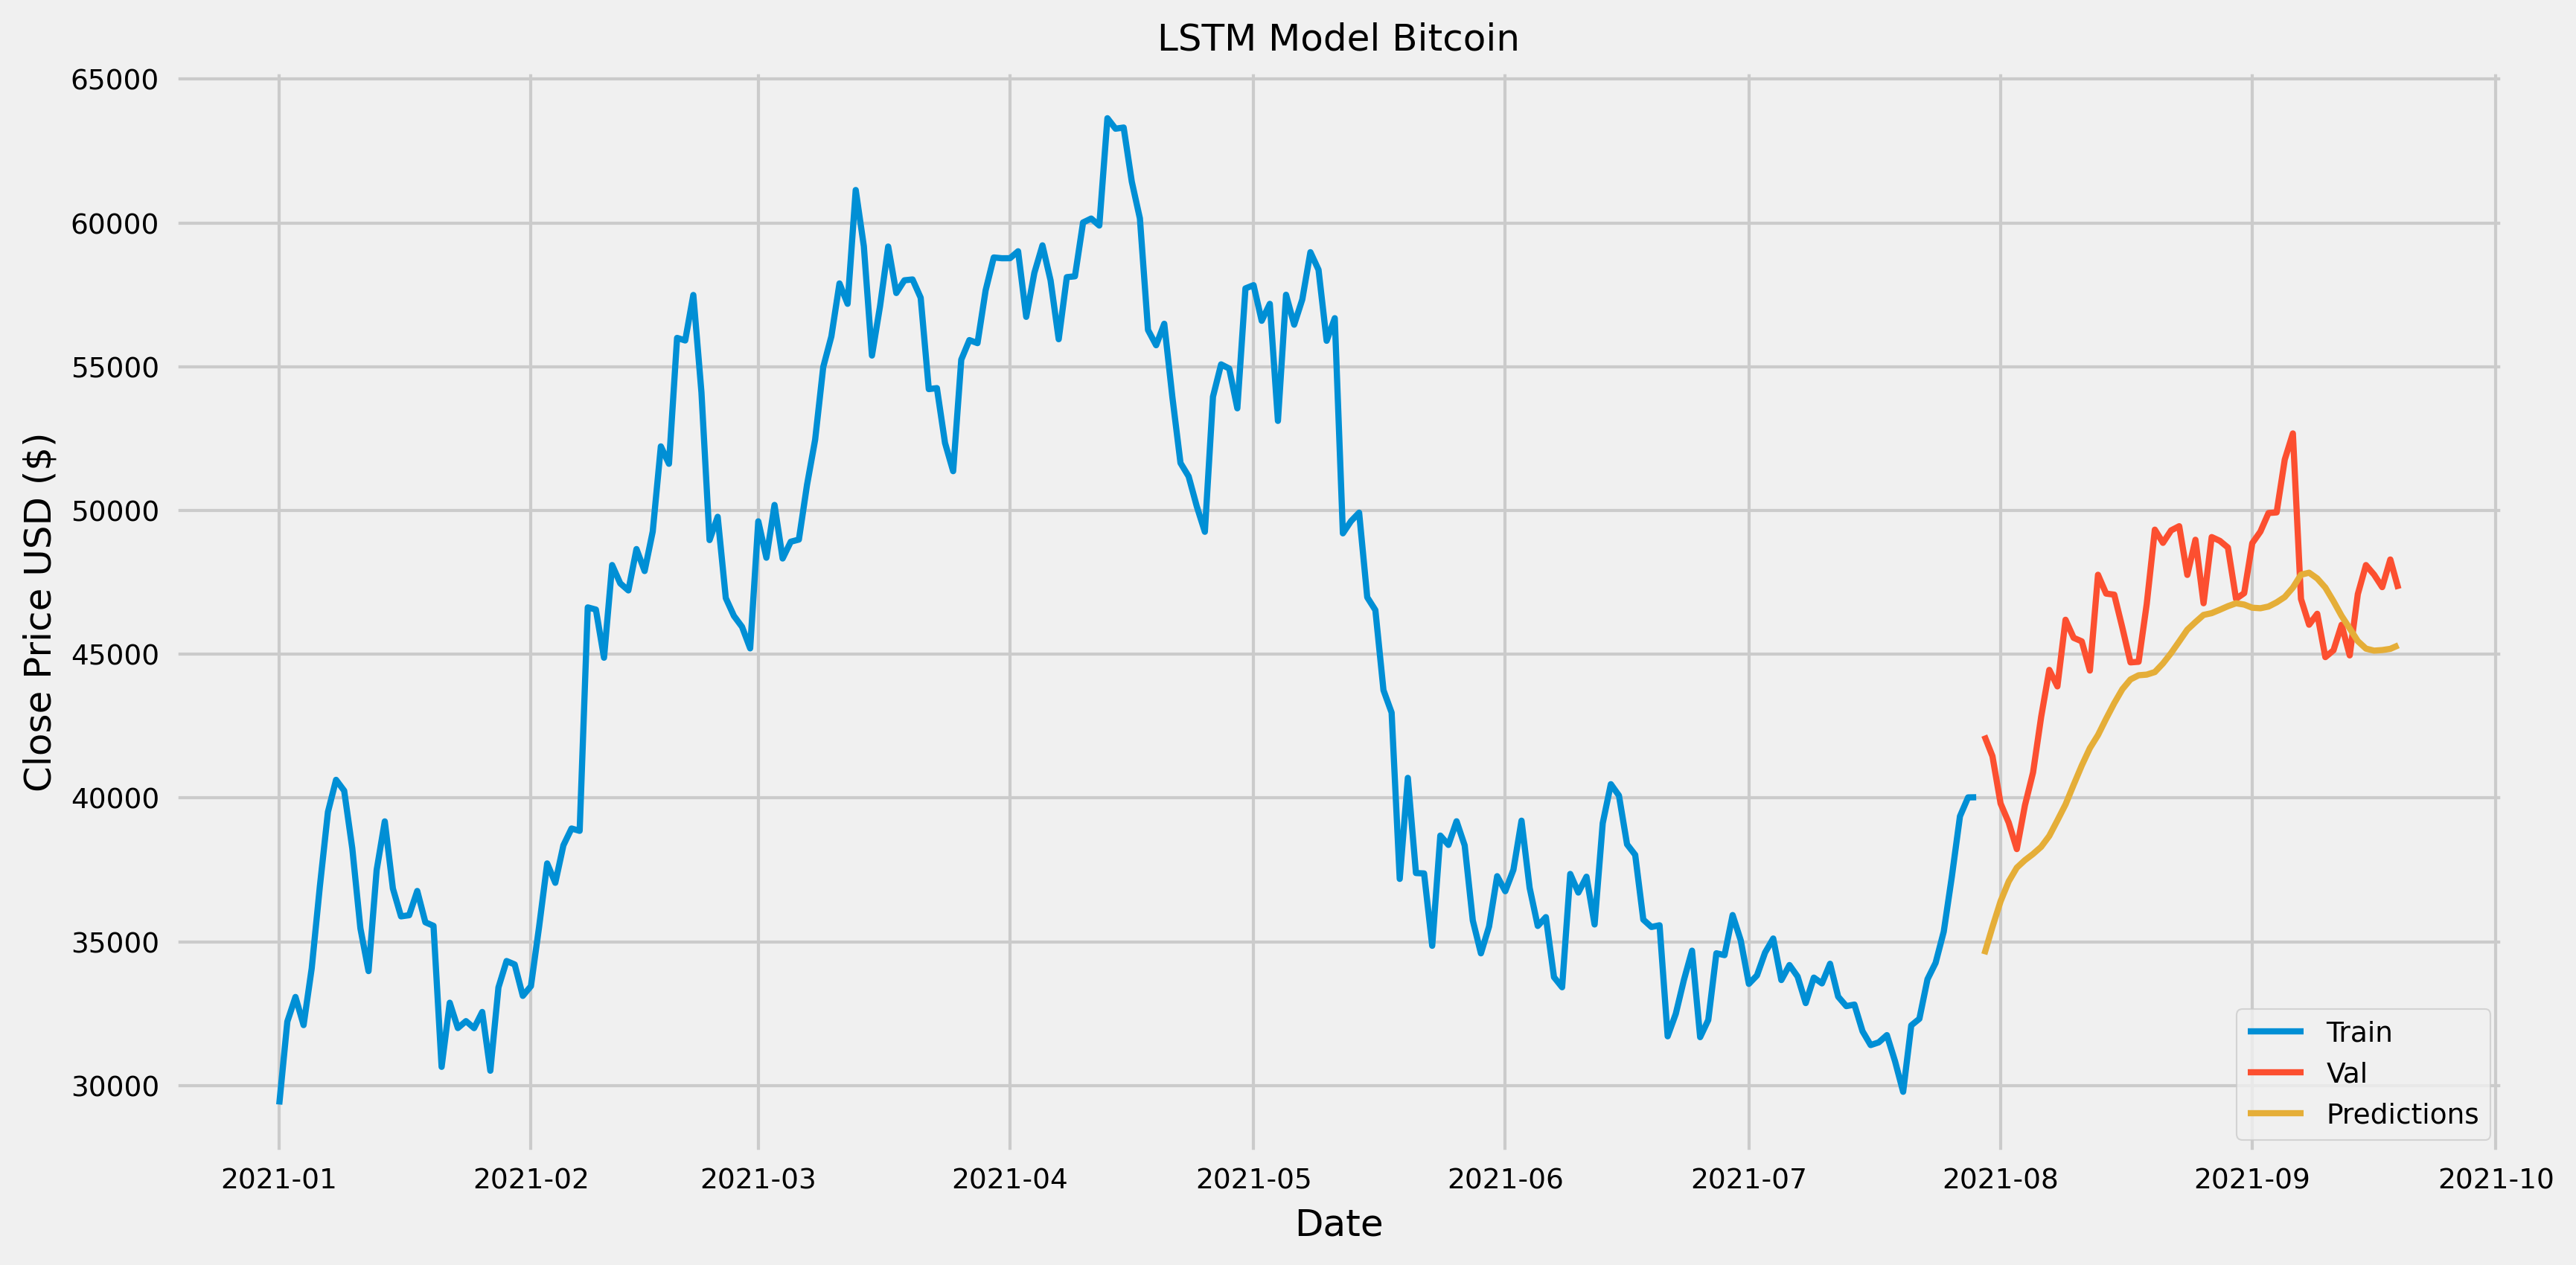

In [22]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(12,6))
plt.title('LSTM Model Bitcoin', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.tick_params(labelsize=9, width=0.2, length=1)

plt.plot(train['Close'], linewidth=2.0)
plt.plot(valid[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right', fontsize=9)
plt.show()

##### <span class="title-section w3-large">Prediction vs Actual Price</span><br>
We see from the chart above, price direction prediction whether the price will be up or down. Next, let's check the accuracy of LSTM prediction. We can check the actual price directly from Yahoo!

In [23]:
# import pandas_datareader as web
# # Get the quote
# btc_quote = web.DataReader('BTC-USD', data_source='yahoo', start='2018-01-01', end='2021-09-20')
# # Create a new dataframe
# new_df = btc_quote.filter(['Close'])
# # Get the last 60 days closing price
# last_60_days = new_df[-60:].values
# # Scale the data to be values between 0 and 1
# last_60_days_scaled = scaler.transform(last_60_days)
# #Create an empty list
# X_test = []
# # Append the past 60 days
# X_test.append(last_60_days_scaled)
# # convert to numpy array
# X_test = np.array(X_test)
# # Reshape
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# # Get the predicted scaled price
# pred_price = model.predict(X_test)
# # undo the scaling
# pred_price = scaler.inverse_transform(pred_price)[0]
# btc_quote2 = web.DataReader('BTC-USD', data_source='yahoo', start='2021-09-20', end='2021-09-20')
# actual_price = btc_quote2['Close'][0]
# actual_price
# accuracy = ((pred_price-actual_price)/actual_price)*100
# print('Prediction close price at 9-20-2021: $', pred_price, sep='')
# print('Actual price at 9-20-2021: $', actual_price, sep='')
# print('Accuracy: ', accuracy, '%', sep='')

The result is +/- 10.7% precision compare to actual close price. Or can I say the accuracy is 90%?  When you close your trading, you will get the actual price. So it is not about the accuracy in terms of dollars, but more importantly help us indicate the direction of how the market is going in the future.

Now, let's see how much gain do we get.

##  `Ethereum LSTM prediction`
Now let's do the same LSTM modeling for Ethereum as we did earlier for Bitcoin.

In [24]:
# selecting the 'Close' column from the 'selected_data1' dataframe, converting it to a numpy array, and then calculating the 
# training data length as 80% of the total dataset length rounded up to the nearest integer using the math.ceil function.
data1 = selected_data1.filter(['Close'])
dataset1 = data1.values
training_data_len1 = math.ceil(len(dataset1) * .8)

# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data1 = scaler.fit_transform(dataset1)

# Create the training data set
# Create the scaled training data set
train_data1 = scaled_data1[0:training_data_len1, :]

# Split the data itno x_train and y_train data sets
x_train1 = []
y_train1 = []

for i in range(60, len(train_data1)):
    x_train1.append(train_data1[i-60:i,0])
    y_train1.append(train_data1[i,0])
    
# Convert the x_train and y_train to numpy arrays
x_train1, y_train1 = np.array(x_train1), np.array(y_train1)
# Reshape the data
x_train1 = np.reshape(x_train1, (x_train1.shape[0], x_train1.shape[1], 1))
# x_train.shape

# Build the LSTM Model
model1 = Sequential()
model1.add(LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], 1)))
model1.add(LSTM(50, return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(1))

In [25]:
# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model1.fit(x_train1, y_train1, batch_size=1, epochs=1)

150/150 [==============================] - 6s 21ms/step - loss: 0.0179


In [26]:
# Create the testing data set
# Create new array containing scaled values from index 1028 to 1359
test_data1 = scaled_data1[training_data_len1 - 60: , :]

# Create the data sets x_test and y_test
x_test1 = []
y_test1 = dataset1[training_data_len1: , :]
for i in range(60, len(test_data1)):
    x_test1.append(test_data1[i-60:i, 0])
    
# convert data to numpy array
x_test1 = np.array(x_test1)

# reshape the data
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1))

# Get the models predicted price values
predictions1 = model1.predict(x_test1)
predictions1 = scaler.inverse_transform(predictions1)

# Get the root mean square error (RMSE)
rmse1 = np.sqrt( np.mean( predictions1 - y_test1 )**2 )

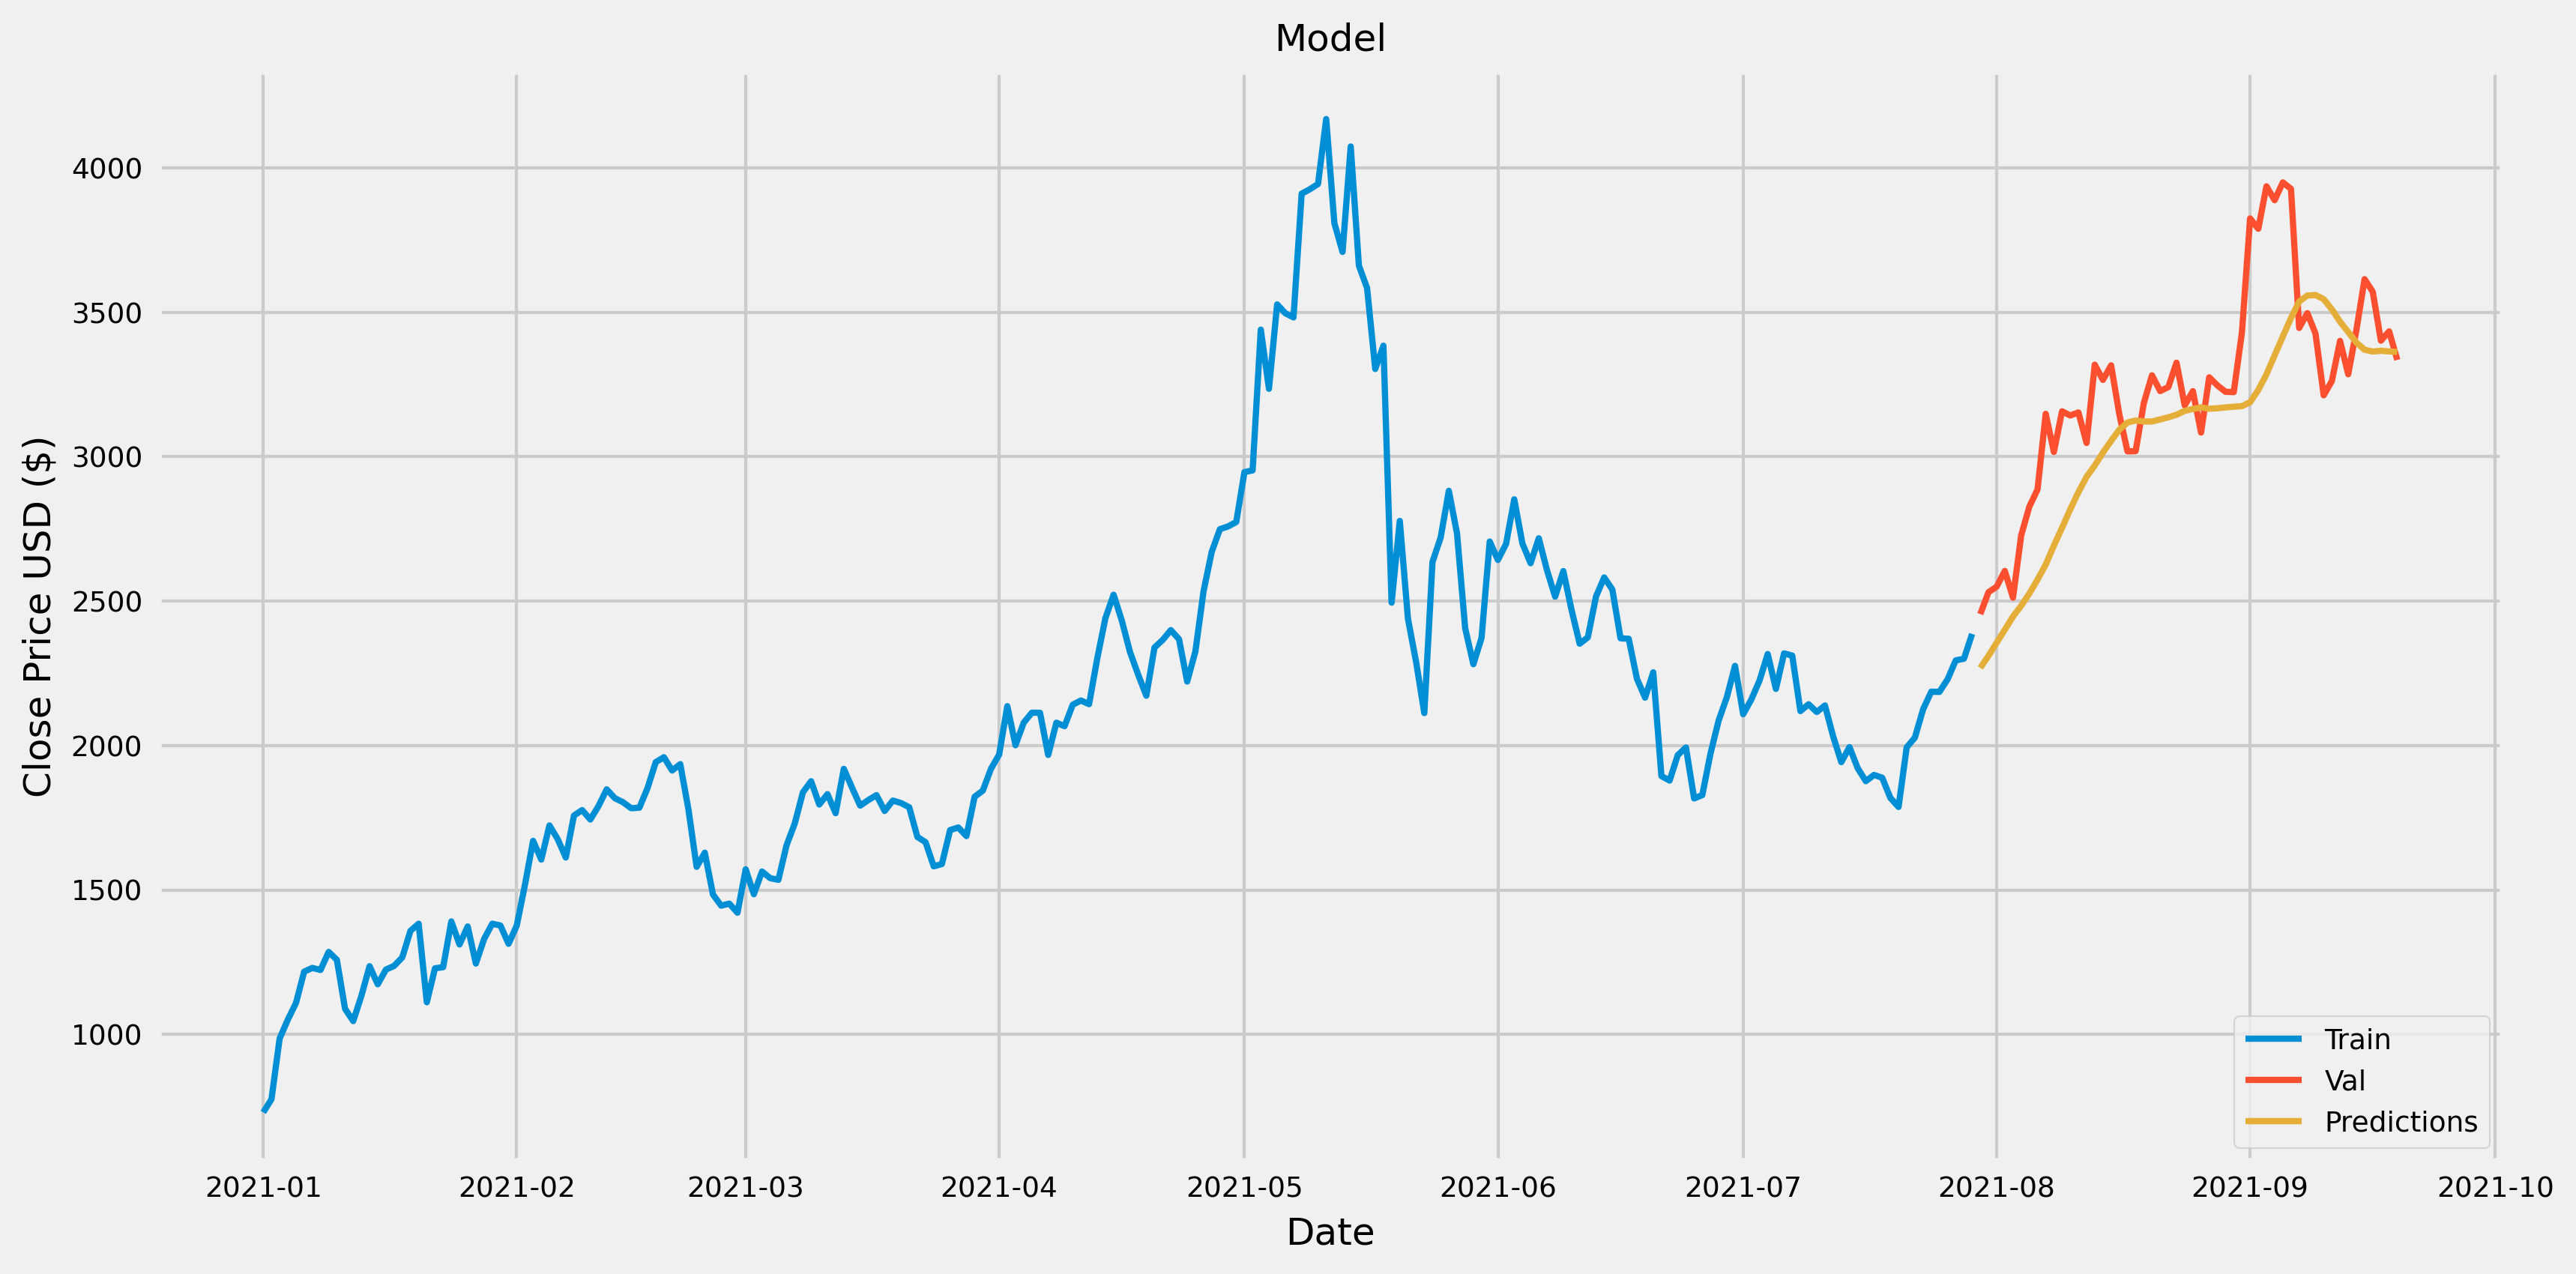

In [27]:
# Plot the data
train1 = data1[:training_data_len1]
valid1 = data1[training_data_len1:]
valid1['Predictions'] = predictions1

# Visualize the data
plt.figure(figsize=(12,6))
plt.title('Model', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.tick_params(labelsize=9, width=0.2, length=1)

plt.plot(train1['Close'], linewidth=2.0)
plt.plot(valid1[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right', fontsize=9)
plt.show()

We see that the prediction line (green line) for Ethereum is aligned with the trend. If we bought the ethereum in early August at around USD21,000, then from this prediction we can sell it at above USD30,000, we can get a decent profit of around 30% within less than two months. We have tested the LTSM prediction modeling to Bitcoin and Ethereum and show that this model works well for crypto currency prediction. 

If we compare with technical indicator which help us in making trading decision, the machine learning approach provide us more confident prediction. We see the visualization prediction in the future where the price direction in the future. While on the other hand technical indicator will give us the signal much closer time frame before the direction start changing its direction.

The two cryptos analysis shows similar result with acceptable predictions. Then we can assure that this LSTM model should works well with other crypto currencies. So next we will do same steps to get the best estimator.

## 7. Price prediction for all assets

In [28]:
# Takes the df_train DataFrame, resets its index and creates a new column TIME with datetime values from the 'timestamp' column of df_train. 
temp = df_train.reset_index(drop = True) 
temp['TIME'] = pd.to_datetime(temp['timestamp'], unit='s')

# Then, it sets the start and end dates to January 1st, 2021, and September 20th, 2021, respectively. 
start = dt.datetime.strptime('2021-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2021-09-20', '%Y-%m-%d')

# Finally, it creates a new DataFrame train_data by selecting only the rows that have a TIME value between the start and end dates (inclusive) using the .loc method.
train_data = temp.loc[temp["TIME"].between(start, end)]

In [29]:
# train test split df_train into 80% train rows and 20% valid rows

def get_Xy_and_model_for_asset(df_train, asset_id):
    df = df_train[df_train["Asset_ID"] == asset_id]
    df = df.filter(['Close'])
    df = df.values
    training_data_len = math.ceil(len(df) * .001)
    # Scale the Data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(df)
    # Create the training data set
    # Create the scaled training data set
    train_data = scaled_data[0:training_data_len, :]

    # Split the data itno x_train and y_train data sets
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i,0])
        y_train.append(train_data[i,0])

    # Convert the x_train and y_train to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)
    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    # x_train.shape
    # Build the LSTM Model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1) # LSTM model
    return x_train, y_train, model

# Initializes empty dictionaries Xs, ys, and models. It then loops through each asset_id and asset_name in df_asset_details, and for each one, it calls a function get_Xy_and_model_for_asset() to get the input (X), output (y), and trained model. 
Xs = {}
ys = {}
models = {}

for asset_id, asset_name in zip(df_asset_details['Asset_ID'], df_asset_details['Asset_Name']):
    print(f"Training model for {asset_name:<16} (ID={asset_id:<2})")
    X, y, model = get_Xy_and_model_for_asset(train_data, asset_id)       
    try:
        Xs[asset_id], ys[asset_id], models[asset_id] = X, y, model
    except: 
        Xs[asset_id], ys[asset_id], models[asset_id] = None, None, None 
        # Finally, it tries to assign these values to the respective dictionaries using the asset_id as the key, and if any error occurs, it assigns None to all three values.


Training model for Bitcoin          (ID=1 )
318/318 [==============================] - 10s 21ms/step - loss: 2.0792e-05
Training model for Ethereum         (ID=6 )
318/318 [==============================] - 10s 22ms/step - loss: 3.3926e-06
Training model for Cardano          (ID=3 )
318/318 [==============================] - 10s 22ms/step - loss: 4.7028e-06
Training model for Binance Coin     (ID=0 )
318/318 [==============================] - 10s 22ms/step - loss: 3.6309e-06
Training model for Dogecoin         (ID=4 )
318/318 [==============================] - 10s 23ms/step - loss: 4.6213e-06
Training model for Bitcoin Cash     (ID=2 )
318/318 [==============================] - 10s 22ms/step - loss: 8.3826e-06
Training model for Litecoin         (ID=9 )
318/318 [==============================] - 10s 21ms/step - loss: 9.3082e-05
Training model for Ethereum Classic (ID=7 )
318/318 [==============================] - 10s 23ms/step - loss: 4.5468e-06
Training model for Stellar          (ID=

In [30]:
# This code reads a CSV file containing supplemental training data, selects specific columns using the usecols parameter, 
# sets the datetime column as the index, drops the timestamp column, and filters the data to only include records from 
# the year 2021 with a month greater than 5 (i.e., June to December). 
sup_train = pd.read_csv('../input/g-research-crypto-forecasting/supplemental_train.csv', 
                 usecols=['Close', 'Target', 'Asset_ID','timestamp'], dtype={'Asset_ID': 'int8'})
sup_train['datetime'] = pd.to_datetime(sup_train['timestamp'], unit='s')
sup_train = sup_train.set_index('datetime').drop('timestamp', axis=1)
sup_train = sup_train[(sup_train.index.year == 2021) & (sup_train.index.month > 5)]

# It then creates a dictionary sup_trains with asset IDs as keys and resampled and interpolated time series data for each asset ID as values. 
sup_trains = {asset_id: sup_train[sup_train['Asset_ID'] == asset_id].resample('1min').interpolate().copy() for asset_id in sup_train['Asset_ID'].unique()}

# Finally, it deletes the original sup_train dataframe to save memory. The comment is a brief summary of what the code does.
del sup_train

### <span class="title-section w3-xlarge">Submission</span><br>
Everything looks good.

In [31]:
import gresearch_crypto
env = gresearch_crypto.make_env()
iter_test = env.iter_test()

In [32]:
df = pd.read_csv('../input/g-research-crypto-forecasting/supplemental_train.csv', 
                 usecols=['Target', 'Asset_ID','timestamp'], dtype={'Asset_ID': 'int8'})
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.set_index('datetime').drop('timestamp', axis=1)
df = df[(df.index.year == 2021) & (df.index.month > 5)]
dfs = {asset_id: df[df['Asset_ID'] == asset_id].resample('1min').interpolate().copy() for asset_id in df['Asset_ID'].unique()}
del df
for df_test, df_pred in iter_test:
    df_test['datetime'] = pd.to_datetime(df_test['timestamp'], unit='s')
    for _, row in df_test.iterrows():
        try:
            df = dfs[row['Asset_ID']]
            closest_train_sample = df.iloc[df.index.get_loc(row['datetime'], method='nearest')]
            df_pred.loc[df_pred['row_id'] == row['row_id'], 'Target'] = closest_train_sample['Target']
        except:
            df_pred.loc[df_pred['row_id'] == row['row_id'], 'Target'] = 0
    df_pred['Target'] = df_pred['Target'].fillna(0)
    env.predict(df_pred)

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.


Check the price if the prediction is correct!

**Thank you!**

## <span class="title-section w3-xlarge">References:</span>
[Wikipedia: Cryptocurrency](https://en.wikipedia.org/wiki/Cryptocurrency)<br>
[Most Commonly-Used Periods in Creating Moving Average (MA) Lines](https://www.investopedia.com/ask/answers/122414/what-are-most-common-periods-used-creating-moving-average-ma-lines.asp)<br>
[Implementation of Technical Indicators into a Machine Learning framework for Quantitative Trading](https://towardsdatascience.com/implementation-of-technical-indicators-into-a-machine-learning-framework-for-quantitative-trading-44a05be8e06)<br>
[AlgoTrading using Technical Indicator and ML models](https://www.analyticsvidhya.com/blog/2021/01/algotrading-using-technical-indicator-and-ml-models/)<br>
[What Is RSI and How Do You Apply It to Crypto Trading?](https://learn.bybit.com/trading/what-is-rsi-and-how-do-you-apply-it-to-crypto-trading/)<br>
[Technical Analysis 101: The Best Technical Indicators for Crypto and Stocks](https://coinmarketcap.com/alexandria/article/technical-analysis-101-the-best-technical-indicators-for-crypto-and-stocks)<br>
[Simple Sequence Prediction With LSTM](https://medium.com/@nutanbhogendrasharma/simple-sequence-prediction-with-lstm-69ff0f4d57cd)<br>
[How to Develop LSTM Models for Time Series Forecasting](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/)